___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this assignment, you must apply ***EDA*** processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges. 

Also, this project aims to improve your ability to implement algorithms for ***Multi-Class Classification***. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

---
---

# #Determines

Dataset contains tree observations from four areas of one national forest district. This dataset includes information on tree type, shadow coverage, distance to nearby landmarks, soil type, and local topography. The goal of the project is to build a model that predicts what types of trees grow in an area.
***The Forest Dataset*** contains approximately 600 thousand lines, also you can easily find many information about it on the web (especially Kaggle).

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (forest, trees) knowledge on the internet to get to know the data set in the fastest way. 

You should implement cleaning, handling with outliers and missing values using Pandas, NumPy and other required modules for the best result in modeling. You should do Feature Engineering.

After that, your final dataset with the new variables you have created will be ready for model building. You will implement ***Support Vector Machine, XGBoost, Random Forest, Desicion Tree*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, create a chart comparing the performance of all models and choose the most successful model.


---
---

# #Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Load Dataset*
    
    *iii. Explore Data*

#### 2.  Data Cleaning
- Detect Missing Values and Outliers 

    *i. Missing Value Detection*
    
    *ii. Outlier Detection*
    
- Deal with Outliers
    
    *i. Drop Outliers*


#### 3. Feature Engineering


#### 4. Prediction (Multi-class Classification)
- Import libraries
- Data Preprocessing
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



---
---

## 1. Exploratory Data Analysis

### Import Libraries, Load Dataset, Exploring Data

#### *i. Import Libraries*

Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [245]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#plt.rcParams["figure.figsize"] = (12,8)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.options.display.float_format = '{:,.3f}'.format

#### *ii. Load Dataset*

In [246]:
df0 = pd.read_csv("treetypes.csv")
df = df0.copy()
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2696,123,10,212,48,2245,237,231,123,2113,...,0,0,0,0,0,0,0,0,0,6
1,3269,110,19,134,40,3734,249,216,88,3960,...,0,0,0,0,0,0,1,0,0,1
2,3283,322,18,346,104,4369,170,217,185,1330,...,0,0,0,0,0,0,1,0,0,7
3,2847,89,31,270,175,1320,248,173,29,889,...,0,0,0,0,0,0,0,0,0,5
4,3248,93,12,507,118,570,239,221,110,945,...,0,0,0,0,0,0,0,0,0,7


#### *iii. Explore Data*
- Focus on numerical and categorical data
- Detect Number of Unique values of each column
- Focus on Target Variable (Cover_Type)
 - Detect relationships and correlations between independent variables and target variable.
 - It may be nice to visualize the class frequencies of the target variable.
- Detect relationships and correlations between independent variables. (You can prefer to keep only one of the highly correlated continuous variables.)
- Consider dropping features that contain little data or that you think will not contribute to the model.

In [247]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Elevation,"250,000.000","2,748.505",418.301,"1,859.000","2,375.000","2,753.000","3,108.000","3,857.000"
Aspect,"250,000.000",156.212,109.653,0.000,65.000,125.000,260.000,360.000
Slope,"250,000.000",16.331,8.317,0.000,10.000,15.000,22.000,65.000
Horizontal_Distance_To_Hydrology,"250,000.000",228.094,209.630,0.000,66.000,180.000,330.000,"1,390.000"
Vertical_Distance_To_Hydrology,"250,000.000",50.898,61.007,-163.000,5.000,32.000,79.000,598.000
Horizontal_Distance_To_Roadways,"250,000.000","1,719.967","1,330.818",0.000,756.000,"1,318.000","2,294.000","7,112.000"
Hillshade_9am,"250,000.000",212.370,30.655,0.000,195.000,220.000,235.000,254.000
Hillshade_Noon,"250,000.000",218.511,22.681,0.000,206.000,222.000,235.000,254.000
Hillshade_3pm,"250,000.000",134.503,46.034,0.000,106.000,137.000,167.000,252.000
Horizontal_Distance_To_Fire_Points,"250,000.000","1,521.757","1,107.378",0.000,734.000,"1,273.000","1,998.000","7,150.000"


In [248]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           250000 non-null  int64
 1   Aspect                              250000 non-null  int64
 2   Slope                               250000 non-null  int64
 3   Horizontal_Distance_To_Hydrology    250000 non-null  int64
 4   Vertical_Distance_To_Hydrology      250000 non-null  int64
 5   Horizontal_Distance_To_Roadways     250000 non-null  int64
 6   Hillshade_9am                       250000 non-null  int64
 7   Hillshade_Noon                      250000 non-null  int64
 8   Hillshade_3pm                       250000 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  250000 non-null  int64
 10  Wilderness_Area_1                   250000 non-null  int64
 11  Wilderness_Area_2                   250000 non-null 

In [249]:
df.select_dtypes("number")

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2696,123,10,212,48,2245,237,231,123,2113,...,0,0,0,0,0,0,0,0,0,6
1,3269,110,19,134,40,3734,249,216,88,3960,...,0,0,0,0,0,0,1,0,0,1
2,3283,322,18,346,104,4369,170,217,185,1330,...,0,0,0,0,0,0,1,0,0,7
3,2847,89,31,270,175,1320,248,173,29,889,...,0,0,0,0,0,0,0,0,0,5
4,3248,93,12,507,118,570,239,221,110,945,...,0,0,0,0,0,0,0,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,2112,339,39,49,17,467,107,151,162,435,...,0,0,0,0,0,0,0,0,0,3
249996,2872,90,31,251,147,2027,248,172,27,508,...,0,0,0,0,0,0,0,0,0,5
249997,2336,57,5,0,0,1429,224,228,139,387,...,0,0,0,0,0,0,0,0,0,4
249998,2563,181,10,0,0,1349,223,246,156,1007,...,0,0,0,0,0,0,0,0,0,5


In [250]:
df.value_counts().sum()

250000

In [251]:
# function for first looking to the columns
def first_looking(col):
    print("column name    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum()*100 / df.shape[0], 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].nunique())
    print("--------------------------------")
    print(df[col].value_counts(dropna = False))

In [252]:
first_looking("Elevation")

column name    :  Elevation
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  1983
--------------------------------
2326    313
2305    300
2952    293
2304    292
2330    287
       ... 
3663      1
3646      1
3676      1
3842      1
1863      1
Name: Elevation, Length: 1983, dtype: int64


In [253]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_1',
       'Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4',
       'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3', 'Soil_Type_4',
       'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7', 'Soil_Type_8',
       'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11', 'Soil_Type_12',
       'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15', 'Soil_Type_16',
       'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19', 'Soil_Type_20',
       'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24',
       'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27', 'Soil_Type_28',
       'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32',
       'Soil_Type_33', 'Soil_Type_34', 'Soil_Type_35', 'Soil_Type_36',
       'Soil_Type_37', '

In [254]:
first_looking("Aspect")

column name    :  Aspect
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  361
--------------------------------
45     1450
90     1372
63     1239
135    1172
117    1172
       ... 
245     253
235     244
244     216
359     202
360       8
Name: Aspect, Length: 361, dtype: int64


In [255]:
first_looking("Slope")

column name    :  Slope
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  59
--------------------------------
10    12315
11    12268
12    11892
13    11885
15    11401
14    11276
9     11190
16    10733
8     10422
17    10043
18     9791
7      9289
19     9016
20     8401
6      8141
21     8077
22     7607
23     6919
5      6588
24     6284
25     6060
26     5462
4      5149
27     4984
28     4534
29     4023
30     3587
3      3545
31     3334
32     2716
33     2232
2      2140
34     1874
35     1489
36     1160
37      908
1       859
38      630
39      452
40      332
41      241
42      147
0       142
43      134
45       81
44       75
46       40
49       36
48       31
47       30
50       17
53        4
52        4
51        3
56        2
65        2
60        1
55        1
57        1
Name: Slope, dtype: int64


In [256]:
first_looking("Horizontal_Distance_To_Hydrology")

column name    :  Horizontal_Distance_To_Hydrology
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  1294
--------------------------------
0       19997
30      11045
60       4374
150      4316
67       2893
        ...  
1275        1
1281        1
1332        1
1324        1
1247        1
Name: Horizontal_Distance_To_Hydrology, Length: 1294, dtype: int64


In [257]:
df.Horizontal_Distance_To_Hydrology.sample(10)

112384    469
37879     331
30087     450
31928     184
140729    286
223388     97
24637     330
129994    124
116740     74
1594       32
Name: Horizontal_Distance_To_Hydrology, dtype: int64

In [258]:
first_looking("Vertical_Distance_To_Hydrology")

column name    :  Vertical_Distance_To_Hydrology
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  578
--------------------------------
 0      28435
 1       3928
 3       3802
 4       3706
 2       3519
        ...  
 514        1
 504        1
-157        1
 491        1
 578        1
Name: Vertical_Distance_To_Hydrology, Length: 578, dtype: int64


In [259]:
first_looking("Horizontal_Distance_To_Roadways")

column name    :  Horizontal_Distance_To_Roadways
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  6501
--------------------------------
150     563
120     404
390     370
240     360
300     360
       ... 
6634      1
6760      1
6400      1
6815      1
6747      1
Name: Horizontal_Distance_To_Roadways, Length: 6501, dtype: int64


In [260]:
first_looking("Horizontal_Distance_To_Roadways")

column name    :  Horizontal_Distance_To_Roadways
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  6501
--------------------------------
150     563
120     404
390     370
240     360
300     360
       ... 
6634      1
6760      1
6400      1
6815      1
6747      1
Name: Horizontal_Distance_To_Roadways, Length: 6501, dtype: int64


In [261]:
first_looking("Hillshade_9am")

column name    :  Hillshade_9am
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  207
--------------------------------
230    4284
226    4266
228    4254
224    4117
231    4050
       ... 
45        1
61        1
64        1
57        1
43        1
Name: Hillshade_9am, Length: 207, dtype: int64


In [262]:
first_looking("Hillshade_Noon")

column name    :  Hillshade_Noon
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  165
--------------------------------
225    5239
223    5199
228    5092
224    5082
226    5042
       ... 
0         2
71        1
74        1
53        1
85        1
Name: Hillshade_Noon, Length: 165, dtype: int64


In [263]:
first_looking("Hillshade_3pm")

column name    :  Hillshade_3pm
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  253
--------------------------------
138    2505
142    2494
143    2487
135    2464
140    2456
       ... 
248       7
249       4
252       2
250       1
251       1
Name: Hillshade_3pm, Length: 253, dtype: int64


In [264]:
first_looking("Horizontal_Distance_To_Fire_Points")

column name    :  Horizontal_Distance_To_Fire_Points
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  6487
--------------------------------
721     281
900     276
618     276
960     268
997     266
       ... 
6074      1
6360      1
4624      1
5885      1
6782      1
Name: Horizontal_Distance_To_Fire_Points, Length: 6487, dtype: int64


### Wilderness Area binary data

In [265]:
first_looking("Wilderness_Area_1")

column name    :  Wilderness_Area_1
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  2
--------------------------------
0    190425
1     59575
Name: Wilderness_Area_1, dtype: int64


In [266]:
first_looking("Wilderness_Area_2")

column name    :  Wilderness_Area_2
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  2
--------------------------------
0    241660
1      8340
Name: Wilderness_Area_2, dtype: int64


In [267]:
first_looking("Wilderness_Area_3")

column name    :  Wilderness_Area_3
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  2
--------------------------------
0    145544
1    104456
Name: Wilderness_Area_3, dtype: int64


In [268]:
first_looking("Wilderness_Area_4")

column name    :  Wilderness_Area_4
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  2
--------------------------------
0    172827
1     77173
Name: Wilderness_Area_4, dtype: int64


### Soil Type binary data

In [269]:
first_looking("Soil_Type_1")

column name    :  Soil_Type_1
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  2
--------------------------------
0    245414
1      4586
Name: Soil_Type_1, dtype: int64


In [270]:
first_looking("Soil_Type_2")

column name    :  Soil_Type_2
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  2
--------------------------------
0    241034
1      8966
Name: Soil_Type_2, dtype: int64


In [271]:
# to get list of continious features
numeric = []

for col in df.columns:
    if df[col].nunique() > 7 : numeric.append(col)
print(numeric)

['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']


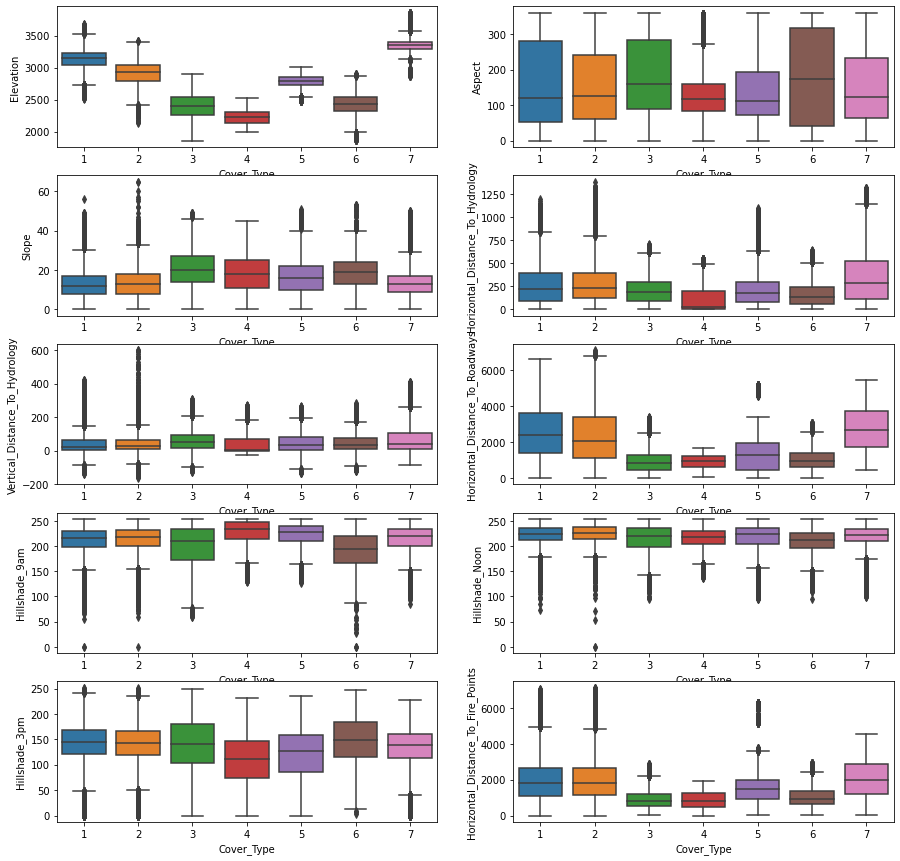

In [272]:
# Visually examine numeric features for outlies with boxplot for each class
fig , ax = plt.subplots(5,2,figsize=(15,15))
counter = 0
for i in range(5):
    for x in range(2):
        sns.boxplot(y = df[numeric[counter]] , x = df["Cover_Type"], ax=ax[i,x])
        counter +=1
plt.show()

 there are lots of outliers

In [273]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_1',
       'Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4',
       'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3', 'Soil_Type_4',
       'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7', 'Soil_Type_8',
       'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11', 'Soil_Type_12',
       'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15', 'Soil_Type_16',
       'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19', 'Soil_Type_20',
       'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24',
       'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27', 'Soil_Type_28',
       'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32',
       'Soil_Type_33', 'Soil_Type_34', 'Soil_Type_35', 'Soil_Type_36',
       'Soil_Type_37', '

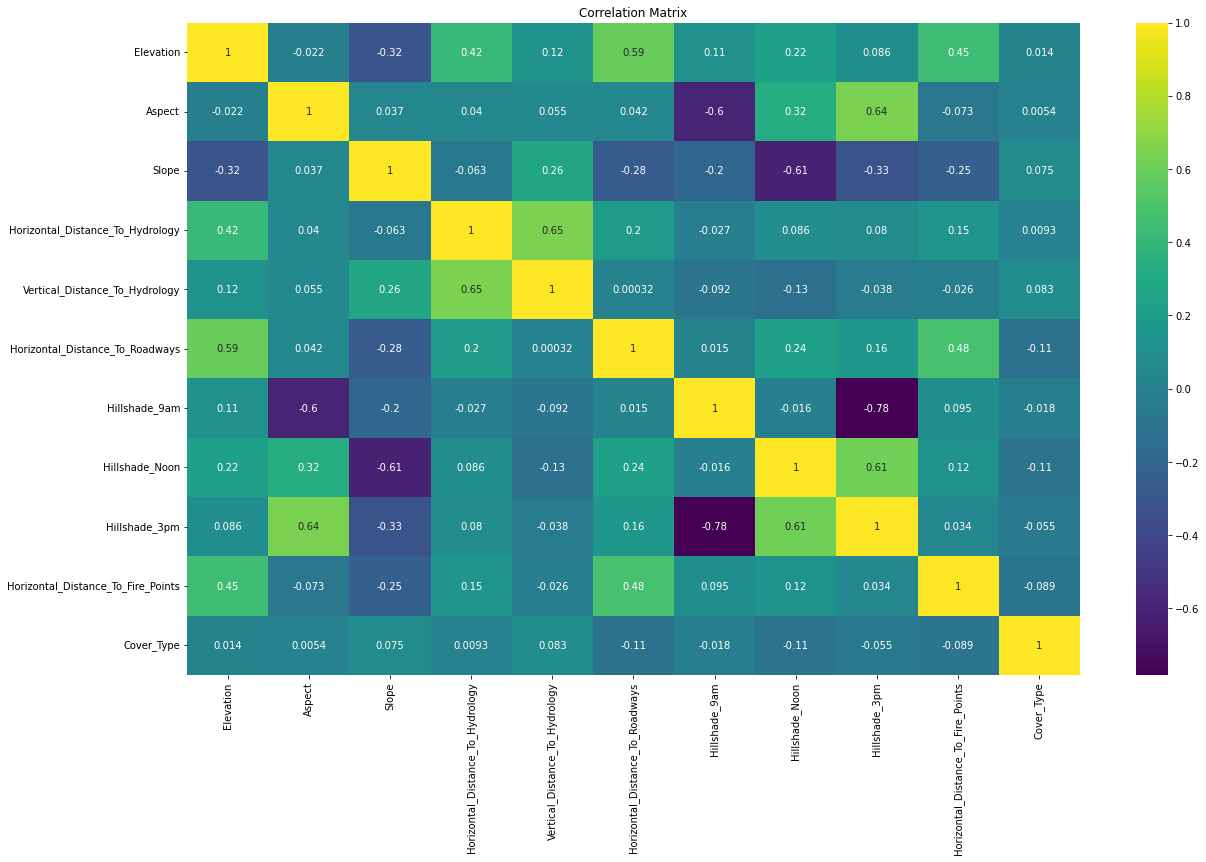

In [274]:
plt.figure(figsize=(20,12))
sns.heatmap(df[['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', "Cover_Type"]].corr(),annot=True, cmap='viridis')
plt.title("Correlation Matrix")

plt.show()

In [275]:
first_looking("Cover_Type")

column name    :  Cover_Type
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  7
--------------------------------
5    36079
1    35836
2    35780
6    35695
7    35690
4    35529
3    35391
Name: Cover_Type, dtype: int64


Text(0, 0.5, 'Data types')

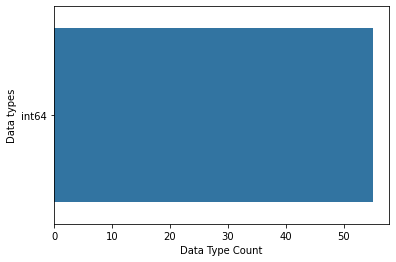

In [276]:
sns.countplot(y=df.dtypes ,data=df)
plt.xlabel("Data Type Count")
plt.ylabel("Data types")

### The skewness for a normal distribution is zero, and any symmetric data should have a skewness near zero. Negative values for the skewness indicate data that are skewed left and positive values for the skewness indicate data that are skewed right. By skewed left, it means that the left tail is long relative to the right tail. Similarly, skewed right means that the right tail is long relative to the left tail.

In [277]:
print(df.skew())

Elevation                              0.070
Aspect                                 0.456
Slope                                  0.544
Horizontal_Distance_To_Hydrology       1.474
Vertical_Distance_To_Hydrology         1.507
Horizontal_Distance_To_Roadways        1.234
Hillshade_9am                         -1.064
Hillshade_Noon                        -0.945
Hillshade_3pm                         -0.331
Horizontal_Distance_To_Fire_Points     1.635
Wilderness_Area_1                      1.229
Wilderness_Area_2                      5.197
Wilderness_Area_3                      0.333
Wilderness_Area_4                      0.828
Soil_Type_1                            7.179
Soil_Type_2                            4.992
Soil_Type_3                            3.767
Soil_Type_4                            4.285
Soil_Type_5                           10.377
Soil_Type_6                            4.876
Soil_Type_7                          129.089
Soil_Type_8                          104.243
Soil_Type_

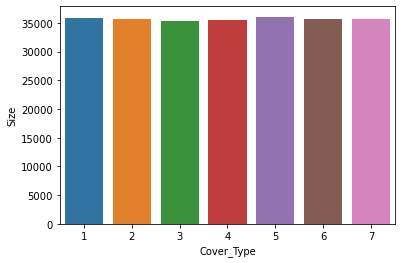

In [278]:
class_dist=df.groupby('Cover_Type').size()
class_label=pd.DataFrame(class_dist,columns=['Size'])
sns.barplot(x=class_label.index,y='Size',data=class_label)
plt.show()

In [279]:
for i,number in enumerate(class_dist):
    percent=(number/class_dist.sum())*100
    print('Cover_Type',class_dist.index[i])
    print('%.2f'% percent,'%')

Cover_Type 1
14.33 %
Cover_Type 2
14.31 %
Cover_Type 3
14.16 %
Cover_Type 4
14.21 %
Cover_Type 5
14.43 %
Cover_Type 6
14.28 %
Cover_Type 7
14.28 %


***
***

## 2.  Data Cleaning

### Detect Missing Values and Outliers

#### *i. Missing Value Detection*

In [280]:
df.isnull().sum().any()

False

#### *ii. Outlier Detection*

The columns which have continuous value should be examined in terms of [outliers](https://datascience.foundation/sciencewhitepaper/knowing-all-about-outliers-in-machine-learning) (Watch out for columns that look like continuous but not continuous!). Some algorithms are [sensitive to outliers](https://arsrinevetha.medium.com/ml-algorithms-sensitivity-towards-outliers-f3862a13c94d), but some algorithms can tolerate them. You can decide to outlier detection according to the algorithm you will use.
- You can check the outliers shape of continous features with respect to the target (Cover_Type) classes.
- You can check how many outliers are there of each continuous variables.
- The columns which have continuous value should be examined in terms of outliers.
- You can define a function to detect outliers in accordance with the ``zscore`` or ``IQR``.

In [281]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2696,123,10,212,48,2245,237,231,123,2113,...,0,0,0,0,0,0,0,0,0,6
1,3269,110,19,134,40,3734,249,216,88,3960,...,0,0,0,0,0,0,1,0,0,1
2,3283,322,18,346,104,4369,170,217,185,1330,...,0,0,0,0,0,0,1,0,0,7
3,2847,89,31,270,175,1320,248,173,29,889,...,0,0,0,0,0,0,0,0,0,5
4,3248,93,12,507,118,570,239,221,110,945,...,0,0,0,0,0,0,0,0,0,7


defining different df based on cont or binary

In [282]:
cont_data=df.loc[:,'Elevation':'Horizontal_Distance_To_Fire_Points']

binary_data=df.loc[:,'Wilderness_Area_1':'Soil_Type_40']

Wilderness_data=df.loc[:,'Wilderness_Area_1': 'Wilderness_Area_4']

Soil_data=df.loc[:,'Soil_Type_1':'Soil_Type_40']

In [283]:
print('Soil Type',' Occurence_count')
for col in binary_data:
    count=binary_data[col].value_counts()[1] #considering all one's among 1 and 0's in each soil type
    if count < 1000:
        print(col,count)

Soil Type  Occurence_count
Soil_Type_7 15
Soil_Type_8 23
Soil_Type_9 153
Soil_Type_15 1
Soil_Type_18 879
Soil_Type_19 717
Soil_Type_21 157
Soil_Type_25 58
Soil_Type_26 797
Soil_Type_27 211
Soil_Type_28 150
Soil_Type_34 375
Soil_Type_36 99
Soil_Type_37 463


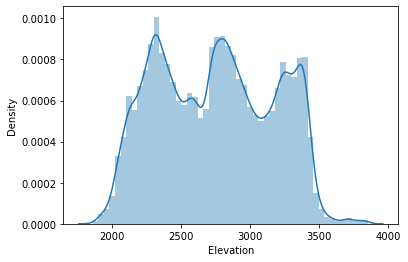

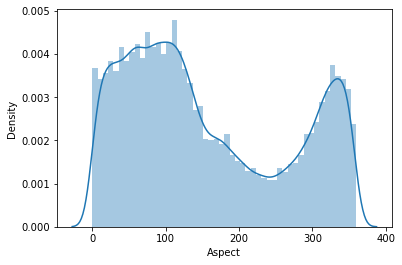

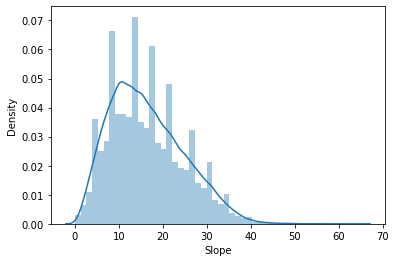

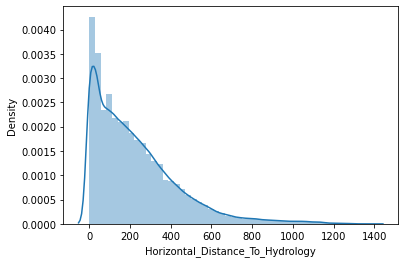

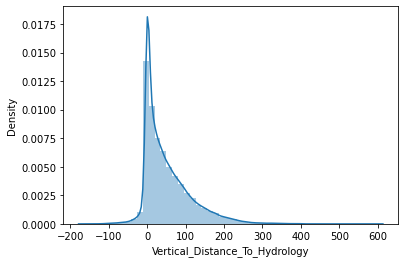

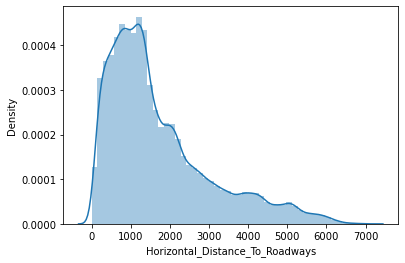

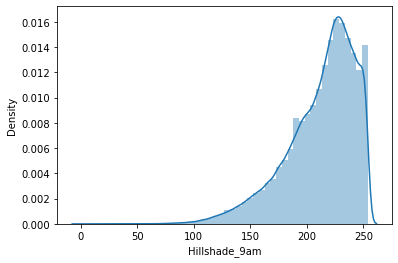

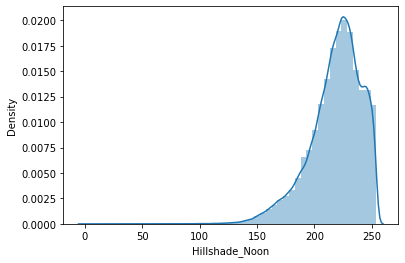

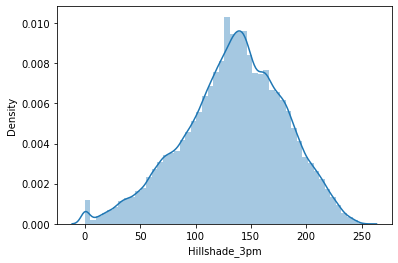

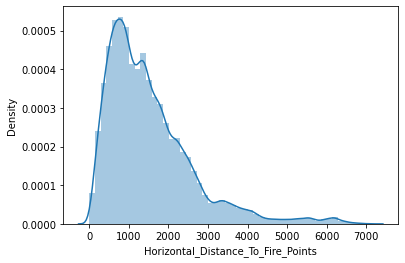

In [284]:
for i, col in enumerate(cont_data.columns):
    plt.figure(i)
    sns.distplot(cont_data[col])

boxplot showing outliers clearly

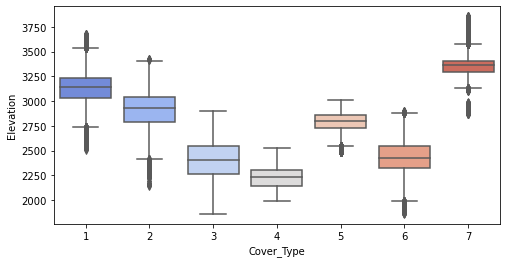

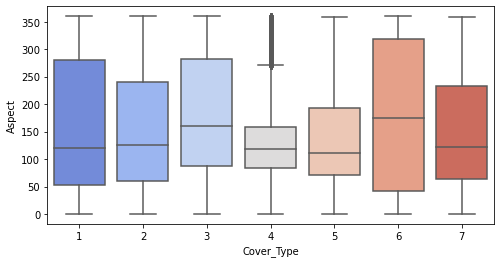

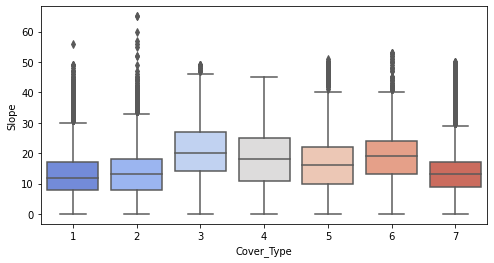

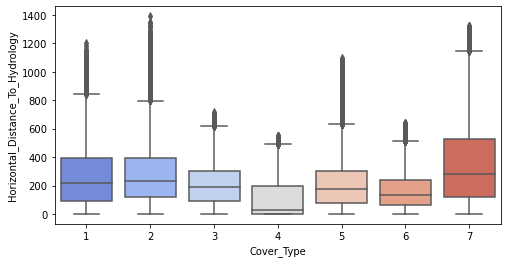

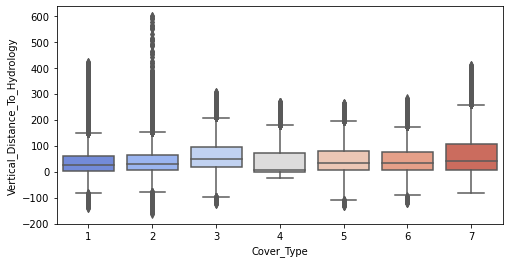

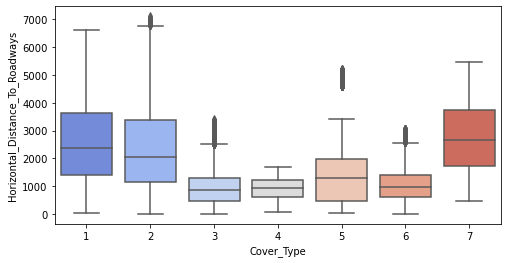

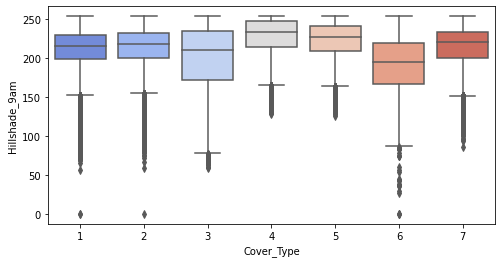

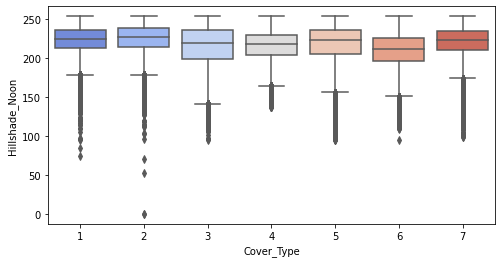

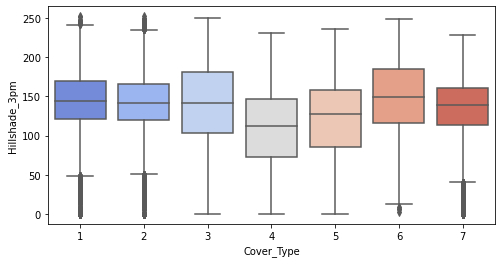

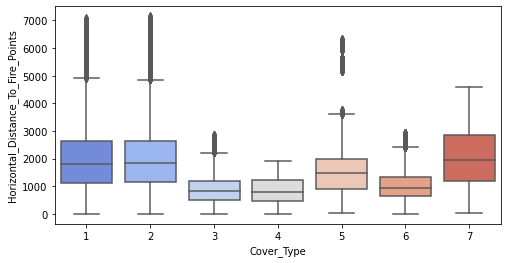

In [285]:
for i, col in enumerate(cont_data.columns):
    plt.figure(i,figsize=(8,4))
    sns.boxplot(x=df['Cover_Type'], y=col, data=df, palette="coolwarm")

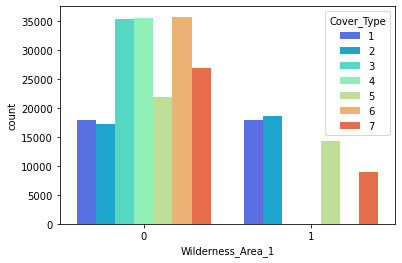

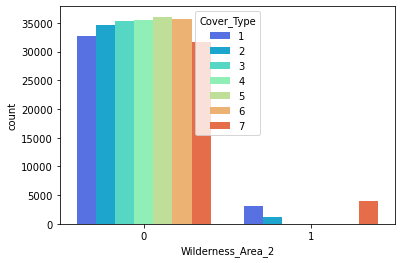

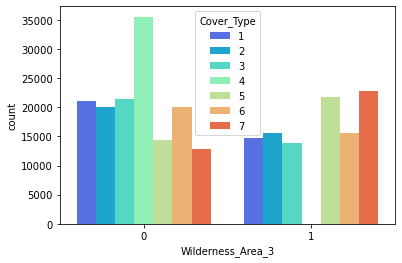

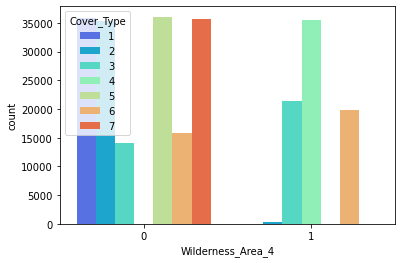

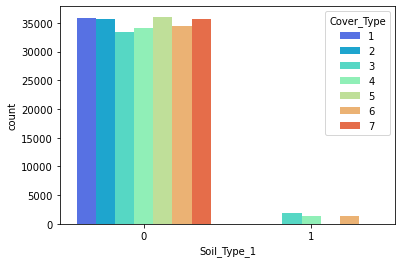

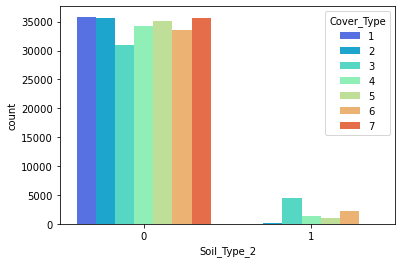

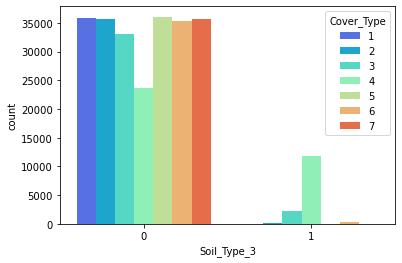

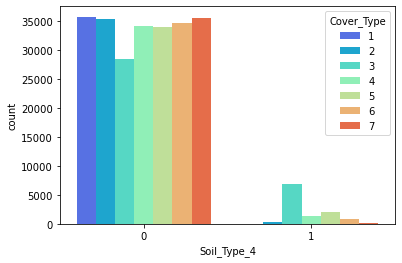

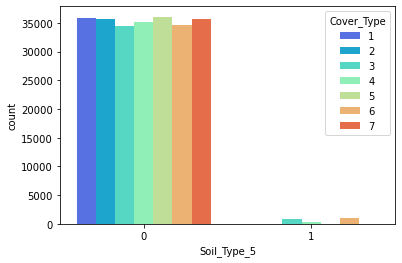

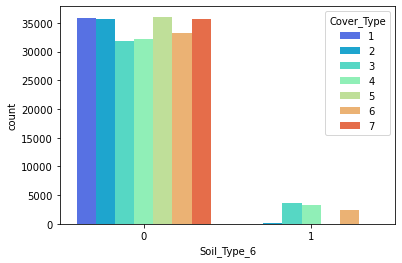

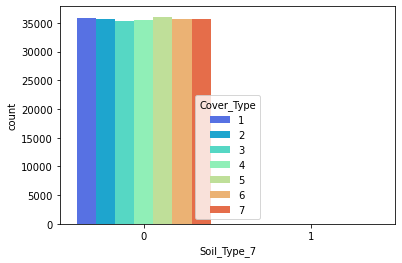

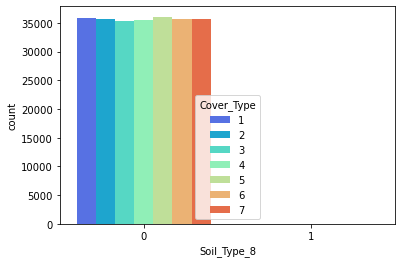

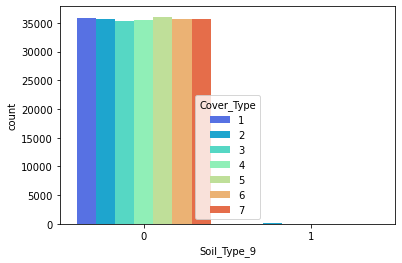

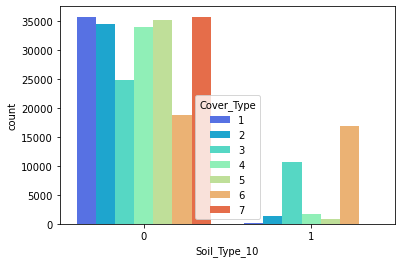

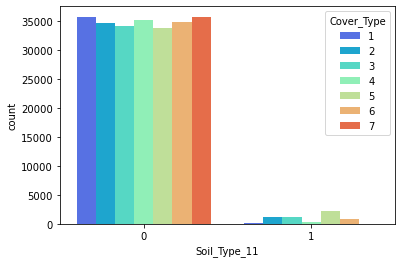

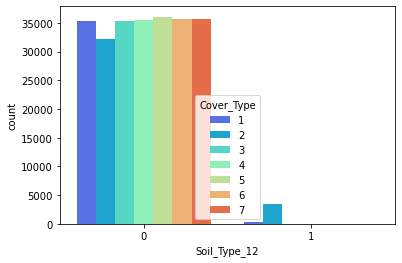

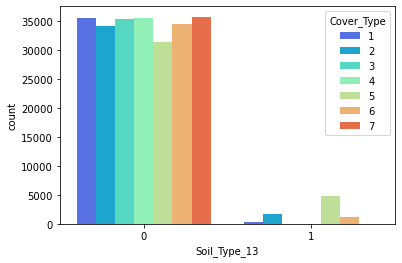

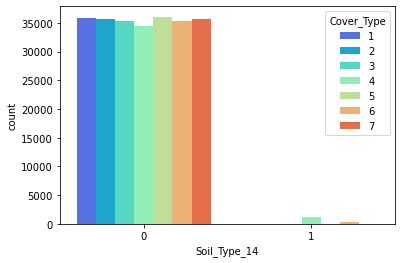

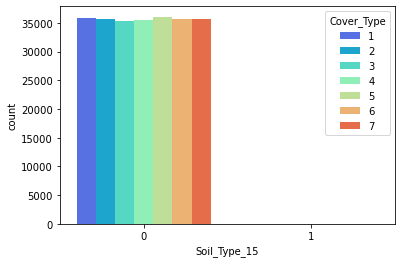

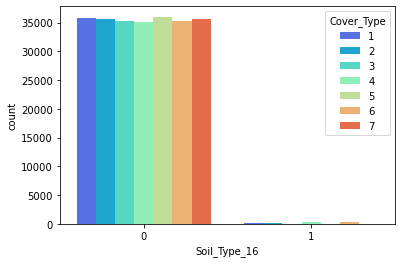

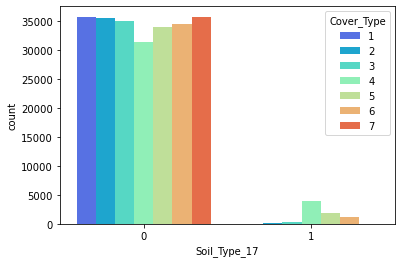

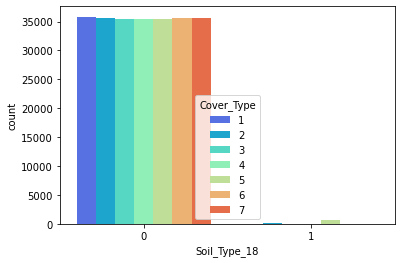

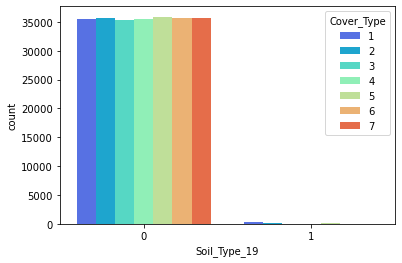

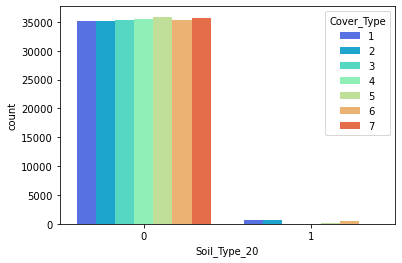

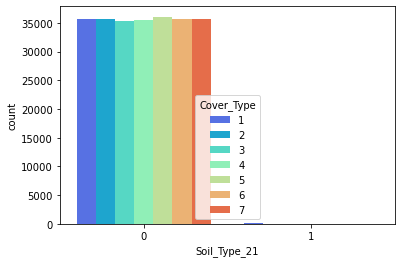

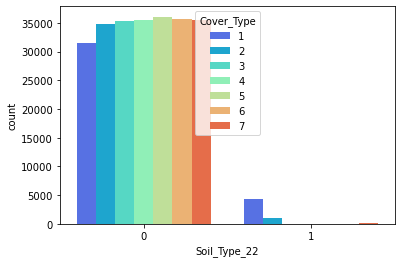

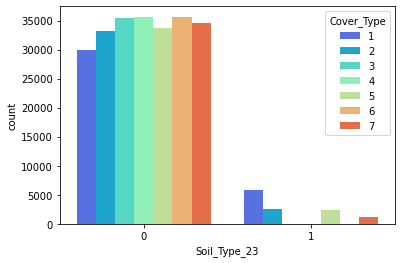

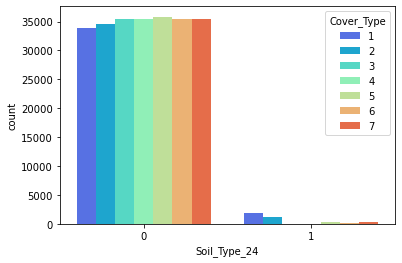

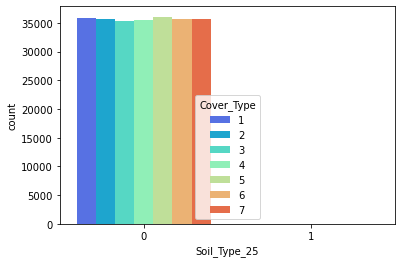

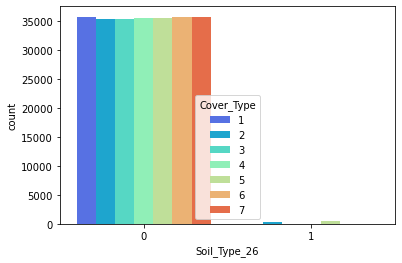

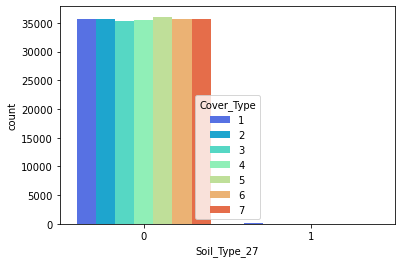

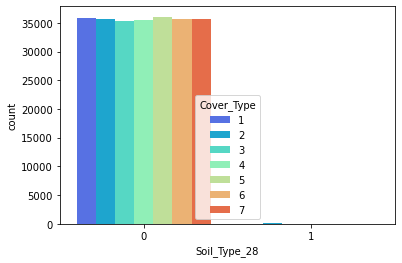

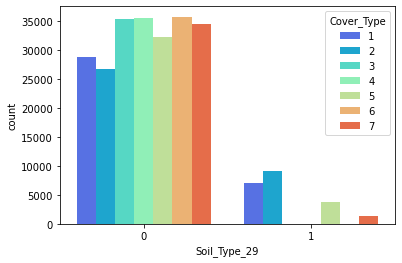

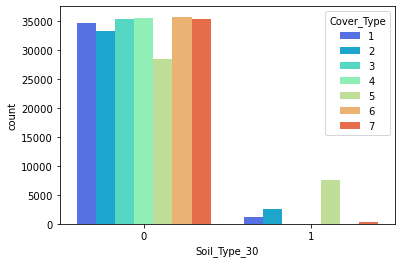

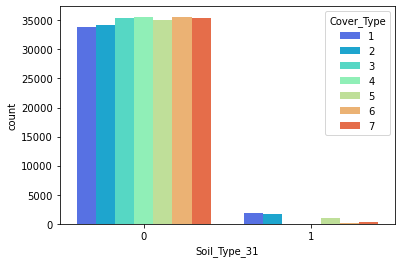

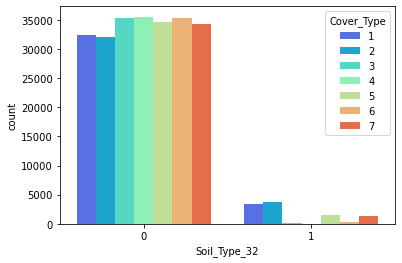

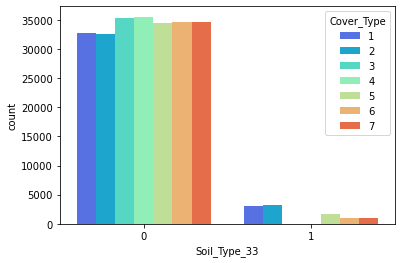

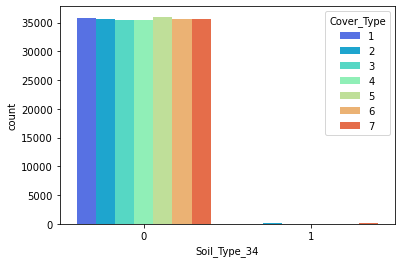

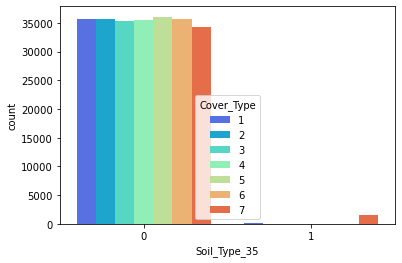

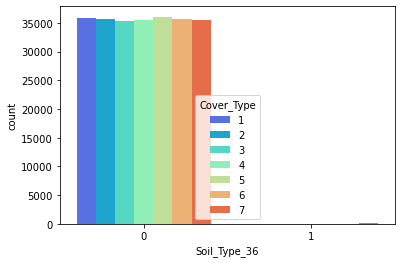

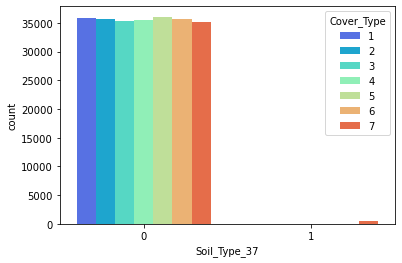

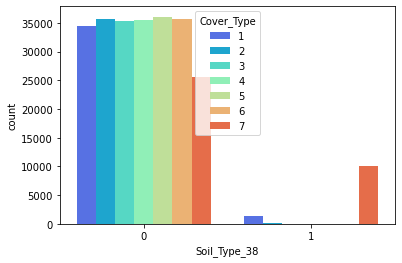

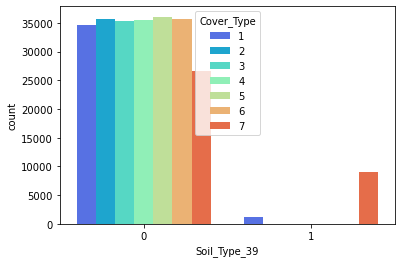

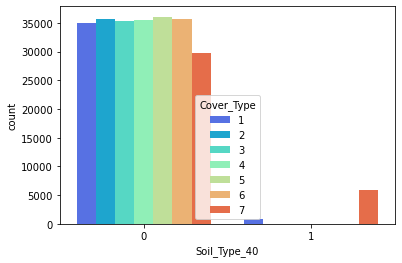

In [286]:
for i, col in enumerate(binary_data.columns):
    plt.figure(i,figsize=(6,4))
    sns.countplot(x=col, hue=df['Cover_Type'] ,data=df, palette="rainbow")

<AxesSubplot:>

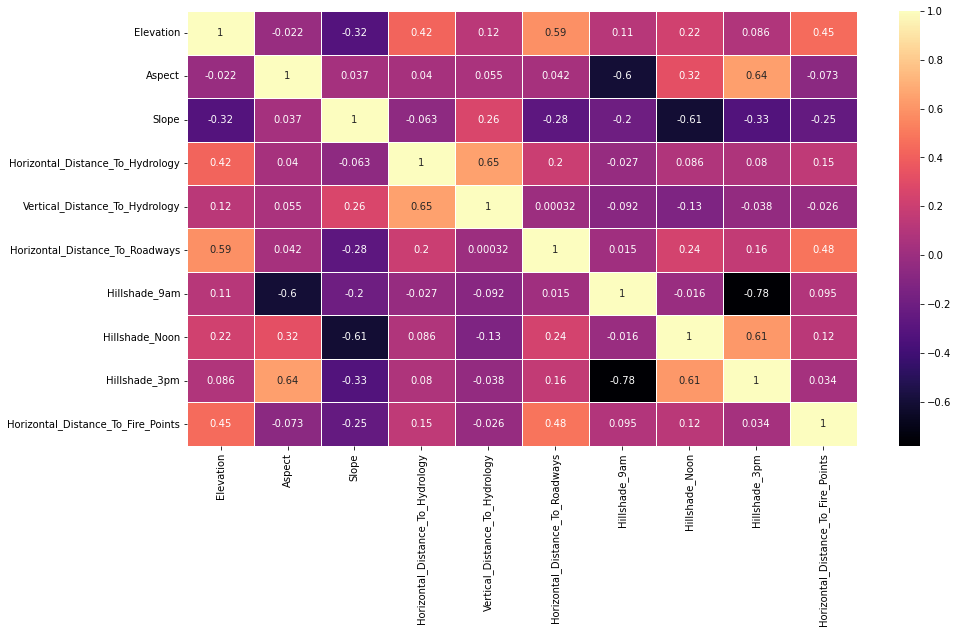

In [287]:
plt.figure(figsize=(15,8))
sns.heatmap(cont_data.corr(),cmap='magma',linecolor='white',linewidths=1,annot=True)

heatmap shows no high corr between features

### Deal with Outliers

definign quantiles

In [288]:
df.shape

(250000, 55)

In [289]:
Q1 = cont_data.quantile(0.25)
Q3 = cont_data.quantile(0.75)
IQR = Q3-Q1
print(IQR)


Elevation                              733.000
Aspect                                 195.000
Slope                                   12.000
Horizontal_Distance_To_Hydrology       264.000
Vertical_Distance_To_Hydrology          74.000
Horizontal_Distance_To_Roadways      1,538.000
Hillshade_9am                           40.000
Hillshade_Noon                          29.000
Hillshade_3pm                           61.000
Horizontal_Distance_To_Fire_Points   1,264.000
dtype: float64


In [290]:
df[((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
1,3269,110,19,134,40,3734,249,216,88,3960,...,0,0,0,0,0,0,1,0,0,1
14,2724,146,16,30,0,2356,240,236,121,6534,...,0,0,0,0,0,0,0,0,0,2
23,3004,127,9,134,19,4227,236,234,129,3975,...,0,0,0,0,0,0,0,0,0,2
25,3373,332,32,274,48,3685,131,181,179,3772,...,0,0,0,0,0,0,0,1,0,7
34,2326,21,36,333,36,700,170,137,78,386,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249981,3311,279,25,532,205,480,146,234,224,912,...,0,0,0,0,0,0,0,0,0,1
249990,3373,93,12,574,216,1409,239,220,109,989,...,0,0,0,0,0,0,0,1,0,7
249992,2843,198,9,857,67,2283,217,248,164,1620,...,0,0,0,0,0,0,0,0,0,5
249995,2112,339,39,49,17,467,107,151,162,435,...,0,0,0,0,0,0,0,0,0,3


#### *ii. Drop Outliers*

In [291]:
# Droping Outlier using IQR
clean_df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
clean_df.shape

(205117, 55)

<AxesSubplot:>

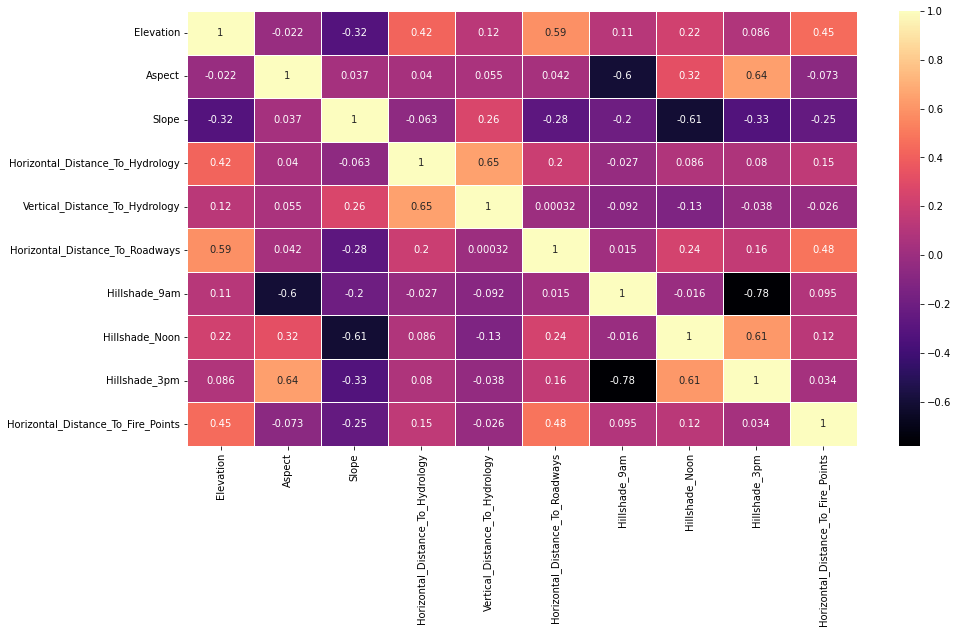

In [292]:
plt.figure(figsize=(15,8))
sns.heatmap(cont_data.corr(),cmap='magma',linecolor='white',linewidths=1,annot=True)

In [293]:
cont_data=clean_df.loc[:,'Elevation':'Horizontal_Distance_To_Fire_Points']

binary_data=clean_df.loc[:,'Wilderness_Area_1':'Soil_Type_40']

Wilderness_data=clean_df.loc[:,'Wilderness_Area_1': 'Wilderness_Area_4']

Soil_data=clean_df.loc[:,'Soil_Type_1':'Soil_Type_40']

<AxesSubplot:>

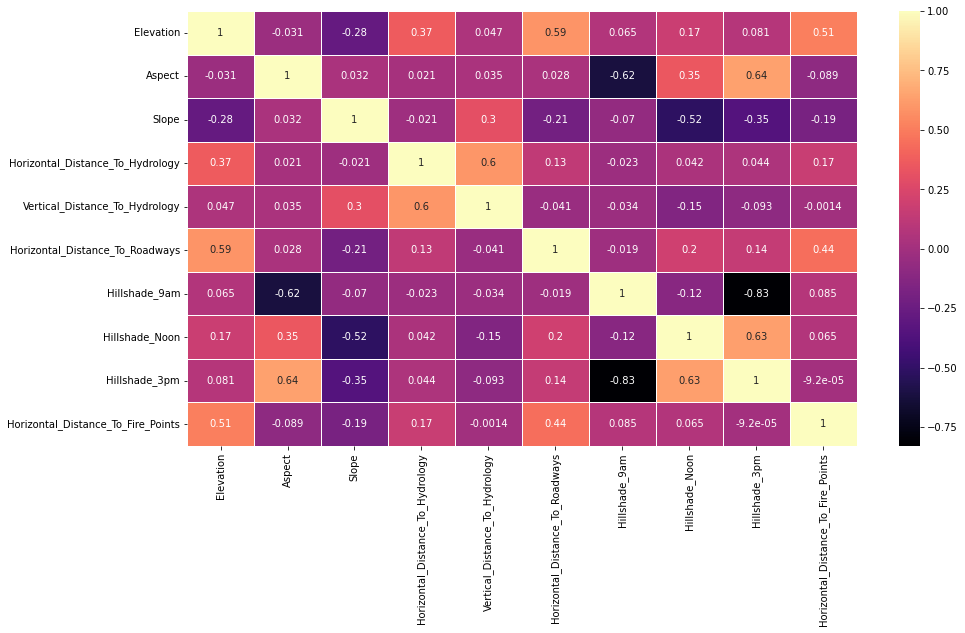

In [294]:
plt.figure(figsize=(15,8))
sns.heatmap(cont_data.corr(),cmap='magma',linecolor='white',linewidths=1,annot=True)

In [295]:
clean_df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2696,123,10,212,48,2245,237,231,123,2113,...,0,0,0,0,0,0,0,0,0,6
2,3283,322,18,346,104,4369,170,217,185,1330,...,0,0,0,0,0,0,1,0,0,7
3,2847,89,31,270,175,1320,248,173,29,889,...,0,0,0,0,0,0,0,0,0,5
4,3248,93,12,507,118,570,239,221,110,945,...,0,0,0,0,0,0,0,0,0,7
5,2855,162,5,85,4,2899,224,241,151,2568,...,0,0,0,0,0,0,0,0,0,2


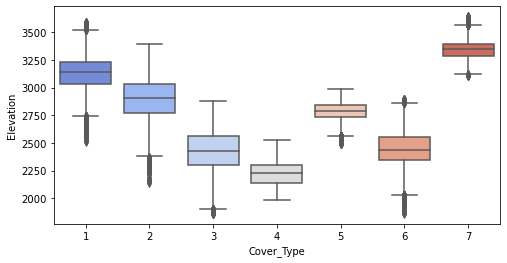

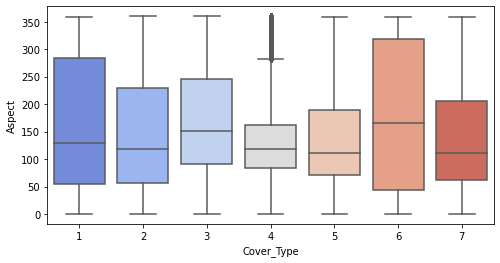

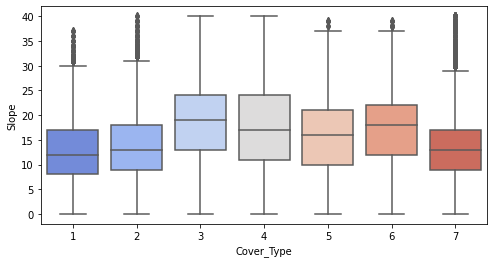

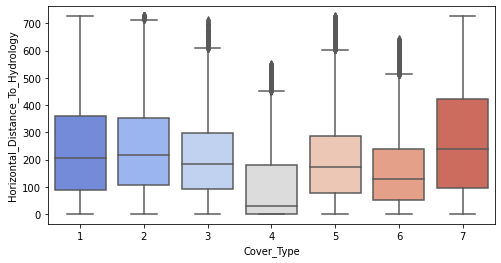

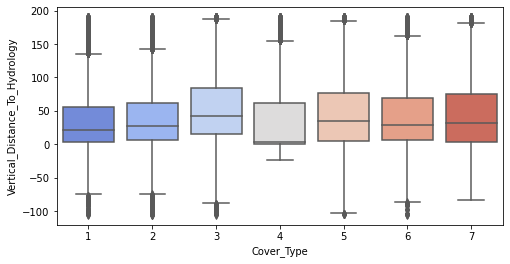

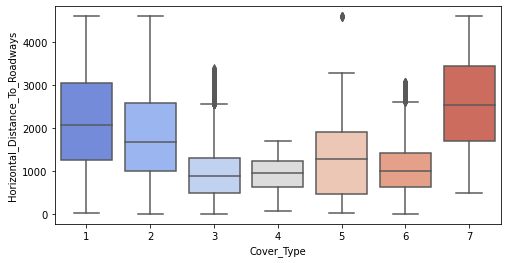

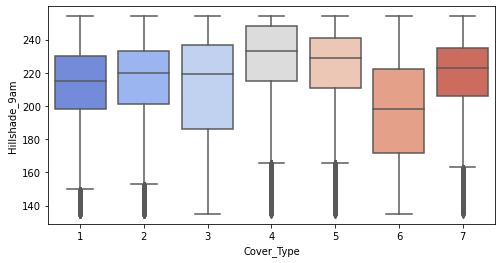

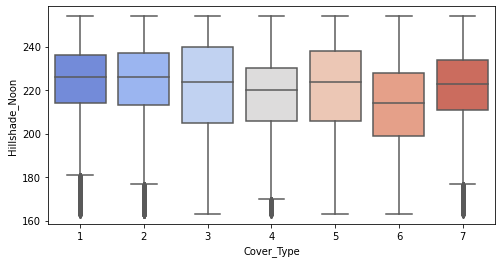

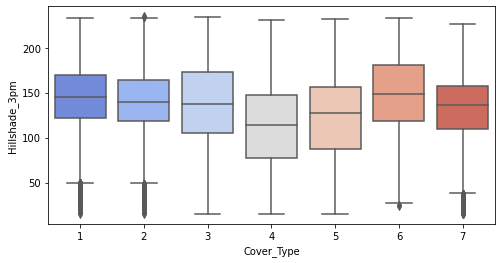

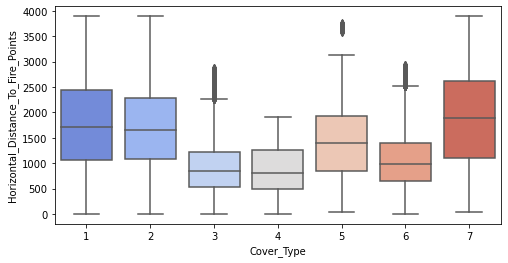

In [296]:
for i, col in enumerate(cont_data.columns):
    plt.figure(i,figsize=(8,4))
    sns.boxplot(x=clean_df['Cover_Type'], y=col, data=clean_df, palette="coolwarm")

<AxesSubplot:xlabel='Vertical_Distance_To_Hydrology'>

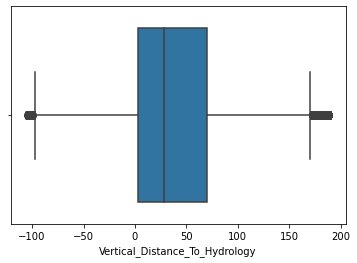

In [297]:
sns.boxplot(clean_df["Vertical_Distance_To_Hydrology"])



In [298]:
# We can produce a function to get the number of outliers respectively each class. 
#For the sake of practicality, we find the outliers for features without consideration of class distinction

def detect_outliers(df, col_name,tukey=1.5):
    ''' 
    this function detects outliers based on 1.5 time IQR and
    returns the number of lower and uper limit and number of outliers respectively
    '''
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                      
    upper_limit = third_quartile+(tukey*IQR)
    lower_limit = first_quartile-(tukey*IQR)
    outlier_count = 0
                      
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count

In [299]:
out_cols = []
for col in numeric:
    print(
        f"{col}\nlower:{detect_outliers(clean_df, col,3)[0]} \nupper:{detect_outliers(clean_df, col,3)[1]}\
        \noutlier:{detect_outliers(clean_df, col,3)[2]}\n*-*-*-*-*-*-*"
    )
    if detect_outliers(clean_df, col,3)[2] > 0 :
        out_cols.append(col)
print(out_cols)        

Elevation
lower:300.0 
upper:5109.0        
outlier:0
*-*-*-*-*-*-*
Aspect
lower:-477.0 
upper:790.0        
outlier:0
*-*-*-*-*-*-*
Slope
lower:-23.0 
upper:54.0        
outlier:0
*-*-*-*-*-*-*
Horizontal_Distance_To_Hydrology
lower:-660.0 
upper:1020.0        
outlier:0
*-*-*-*-*-*-*
Vertical_Distance_To_Hydrology
lower:-198.0 
upper:271.0        
outlier:0
*-*-*-*-*-*-*
Horizontal_Distance_To_Roadways
lower:-3127.0 
upper:5882.0        
outlier:0
*-*-*-*-*-*-*
Hillshade_9am
lower:84.0 
upper:350.0        
outlier:0
*-*-*-*-*-*-*
Hillshade_Noon
lower:123.0 
upper:319.0        
outlier:0
*-*-*-*-*-*-*
Hillshade_3pm
lower:-75.0 
upper:345.0        
outlier:0
*-*-*-*-*-*-*
Horizontal_Distance_To_Fire_Points
lower:-2696.0 
upper:5263.0        
outlier:0
*-*-*-*-*-*-*
[]


### Target Column

In [300]:
for i in range(1,8) :
    print("the shape of the value of", i, clean_df[clean_df["Cover_Type"] == i].shape)

the shape of the value of 1 (26637, 55)
the shape of the value of 2 (25797, 55)
the shape of the value of 3 (29592, 55)
the shape of the value of 4 (33997, 55)
the shape of the value of 5 (30868, 55)
the shape of the value of 6 (31924, 55)
the shape of the value of 7 (26302, 55)


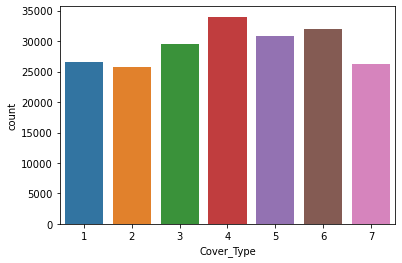

In [301]:
sns.countplot(x='Cover_Type',data=clean_df);

>> I can see that target is balanced in each feature


In [302]:
def perc_col(clean_df,col):
    print(f'Percentage of df["{col}"] Unique Values:\n')
    for i in sorted(df[col].unique()):
        print('%s: %%%.2f' % (i, 100*df[col].value_counts()[i]/len(df)))

In [303]:
perc_col(clean_df,'Cover_Type')

Percentage of df["Cover_Type"] Unique Values:

1: %14.33
2: %14.31
3: %14.16
4: %14.21
5: %14.43
6: %14.28
7: %14.28


### Now, let's take a closer look at correlation of continuous columns.

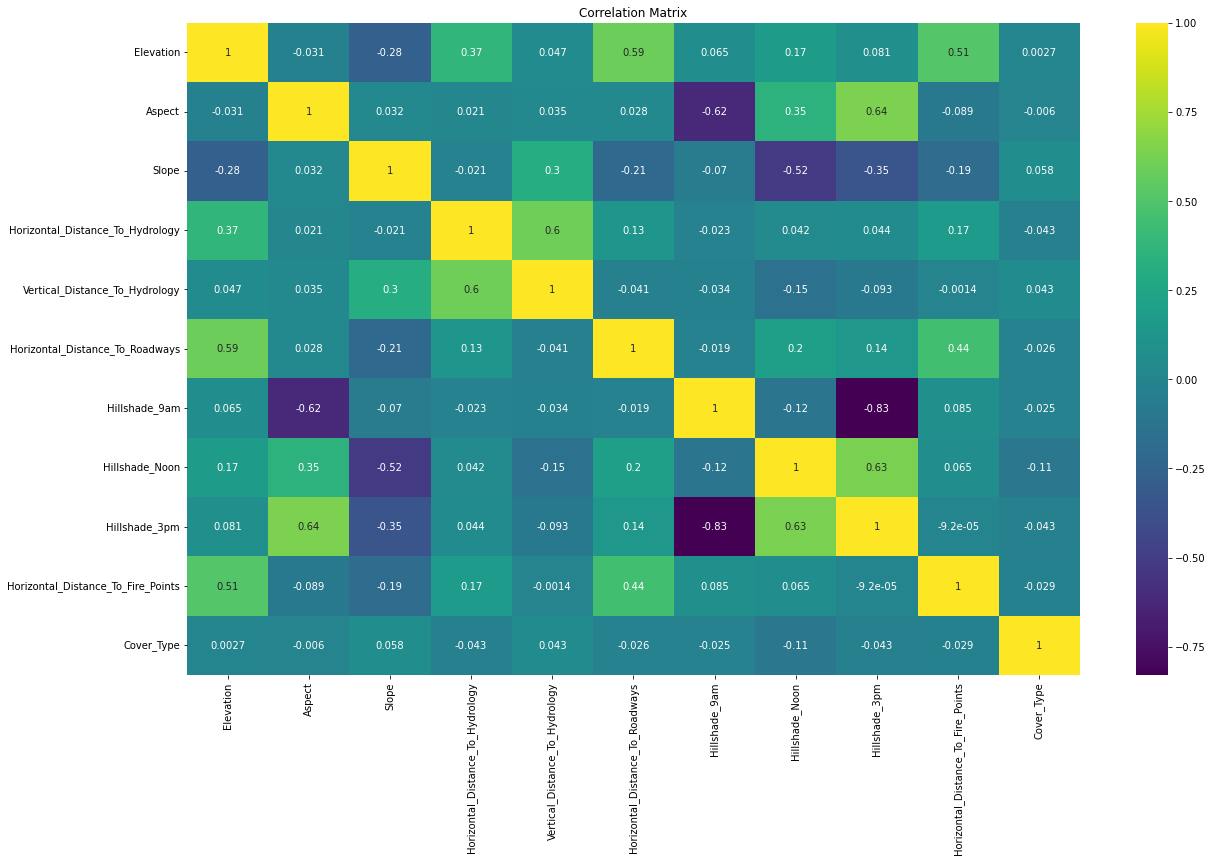

In [304]:
plt.figure(figsize=(20,12))
sns.heatmap(clean_df[['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', "Cover_Type"]].corr(),annot=True, cmap='viridis')
plt.title("Correlation Matrix")

plt.show()

***
***

## 3. Feature Engineering

### My Plan of Feature Extraction
- First, I decided to produce&transform a new column with ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns. New column will contain the values of **Hypotenuse** of ``horizantal`` and ``vertical`` distances.

- As second, we can produce&transform an additional column which contains **average** of Horizantal Distances to Hydrology and Roadways.

- Third, I decided to transform a new column which contains **average** of `Elevation` and ``Vertical_Distance_To_Hydrology`` columns. So that, there is no need to have ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns, because I have new columns which represent more value than them. I decide to drop these columns.

- Note that, after seeing the result of the models, there may be a possibility of making minor changes to the features in the modeling phase.

#### distance to hyrdology column created

In [305]:
clean_df["Distance_To_Hydrology"] = np.sqrt(clean_df["Horizontal_Distance_To_Hydrology"]**2 + clean_df["Vertical_Distance_To_Hydrology"]**2)

In [306]:
clean_df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type,Distance_To_Hydrology
0,2696,123,10,212,48,2245,237,231,123,2113,...,0,0,0,0,0,0,0,0,6,217.366
2,3283,322,18,346,104,4369,170,217,185,1330,...,0,0,0,0,0,1,0,0,7,361.292
3,2847,89,31,270,175,1320,248,173,29,889,...,0,0,0,0,0,0,0,0,5,321.753
4,3248,93,12,507,118,570,239,221,110,945,...,0,0,0,0,0,0,0,0,7,520.551
5,2855,162,5,85,4,2899,224,241,151,2568,...,0,0,0,0,0,0,0,0,2,85.094


#### average of Horizantal Distances to Hydrology and Roadways.


In [308]:
clean_df["Avg_Distance_Road_Hydro"] = (clean_df.Horizontal_Distance_To_Hydrology + clean_df.Horizontal_Distance_To_Roadways)/2

In [309]:
clean_df.Avg_Distance_Road_Hydro.head()

0   1,228.500
2   2,357.500
3     795.000
4     538.500
5   1,492.000
Name: Avg_Distance_Road_Hydro, dtype: float64

In [311]:
clean_df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type,Distance_To_Hydrology,Avg_Distance_Road_Hydro,Avg_Distance_Elevation_Hydro
0,2696,123,10,212,48,2245,237,231,123,2113,...,0,0,0,0,0,0,6,217.366,"1,228.500","1,372.000"
2,3283,322,18,346,104,4369,170,217,185,1330,...,0,0,0,1,0,0,7,361.292,"2,357.500","1,693.500"
3,2847,89,31,270,175,1320,248,173,29,889,...,0,0,0,0,0,0,5,321.753,795.000,"1,511.000"
4,3248,93,12,507,118,570,239,221,110,945,...,0,0,0,0,0,0,7,520.551,538.500,"1,683.000"
5,2855,162,5,85,4,2899,224,241,151,2568,...,0,0,0,0,0,0,2,85.094,"1,492.000","1,429.500"


In [310]:
clean_df["Avg_Distance_Elevation_Hydro"] = (clean_df.Elevation + clean_df.Vertical_Distance_To_Hydrology)/2

In [312]:
clean_df.drop(["Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology",
    "Horizontal_Distance_To_Roadways", "Elevation"
], axis=1, inplace=True)

In [313]:
clean_df.head()

,Aspect,Slope,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,...,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type,Distance_To_Hydrology,Avg_Distance_Road_Hydro,Avg_Distance_Elevation_Hydro
0,123,10,237,231,123,2113,0,0,1,0,...,0,0,0,0,0,0,6,217.366,"1,228.500","1,372.000"
2,322,18,170,217,185,1330,1,0,0,0,...,0,0,0,1,0,0,7,361.292,"2,357.500","1,693.500"
3,89,31,248,173,29,889,0,0,1,0,...,0,0,0,0,0,0,5,321.753,795.000,"1,511.000"
4,93,12,239,221,110,945,0,0,1,0,...,0,0,0,0,0,0,7,520.551,538.500,"1,683.000"
5,162,5,224,241,151,2568,1,0,0,0,...,0,0,0,0,0,0,2,85.094,"1,492.000","1,429.500"


In [316]:
clean_df.to_csv("treetypes_cleaned.csv", index = False)

***
***

## 4. Prediction (Multi-class Classification)

If you have done, use your data set resulting from Feature Engineering task. If you haven't done Feature Engineering, use the latest version of your data set.
In this section, you have two main tasks that apply to each algorithm:
1. Model Building and Prediction

 - SVM (Use ``LinearSVC`` model from``sklearn.svm`` module)
 - Decision Tree (Use ``DecisionTreeClassifier`` model from ``sklearn.tree`` module)
 - Random Forest (Use ``RandomForestClassifier`` model from ``sklearn.ensemble`` module) 
 - XGBoost (Use ``XGBClassifier`` model from``xgboost`` module)

2. Visualizing the Result

- Use [yellowbrick](https://www.scikit-yb.org/en/latest/), [seaborn](https://seaborn.pydata.org/tutorial/regression.html) or [matplotlib](https://matplotlib.org/) modules to visualize the model results.

- Show three plots for the results:
 - Class Prediction Error Bar Plot
 - Confusion Matrix
 - Classification Report

### Import Libraries

In [315]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
from IPython.core.pylabtools import figsize
from scipy.stats import zscore
from scipy import stats
from numpy import percentile
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from statsmodels.formula.api import ols
from scipy.stats import zscore
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit
from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy
from sklearn.metrics import f1_score
font_title = {'family': 'times new roman', 'color': 'darkred', 
              'weight': 'bold', 'size': 14}

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

plt.rcParams['figure.dpi'] = 100

### Data Preprocessing

- Drop target variable
- Train-Test Split

*Note: You can use the train and test data generated here for all algorithms.*

In [317]:
df = pd.read_csv("treetypes_cleaned.csv")

In [318]:
df.head()

,Aspect,Slope,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,...,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type,Distance_To_Hydrology,Avg_Distance_Road_Hydro,Avg_Distance_Elevation_Hydro
0,123,10,237,231,123,2113,0,0,1,0,...,0,0,0,0,0,0,6,217.366,"1,228.500","1,372.000"
1,322,18,170,217,185,1330,1,0,0,0,...,0,0,0,1,0,0,7,361.292,"2,357.500","1,693.500"
2,89,31,248,173,29,889,0,0,1,0,...,0,0,0,0,0,0,5,321.753,795.000,"1,511.000"
3,93,12,239,221,110,945,0,0,1,0,...,0,0,0,0,0,0,7,520.551,538.500,"1,683.000"
4,162,5,224,241,151,2568,1,0,0,0,...,0,0,0,0,0,0,2,85.094,"1,492.000","1,429.500"


In [319]:
X = df.drop("Cover_Type", axis = 1)

y = df["Cover_Type"]

### Implement Support Vector Machine
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

*Note: You probably won't get a successful result. You may need to make some changes to the model or data. This may be a topic worth investigating, you decide.*

In [322]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix

In [320]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [323]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)# STRATIFY why?

In [ ]:
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
eval_metric(svm_model, X_train, y_train, X_test, y_test)

In [ ]:
from sklearn.model_selection import cross_validate

model = SVC(random_state=42)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

### Implement Decision Tree Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

### Implement Random Forest Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

### Implement XGBoost Classifer
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

### Compare The Models

So far, you have created a multi-classifier model with 4 different algorithms and made predictions. You can observe the performance of the models together with a barplot of your choice.

- Which algorithm did you achieve the highest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

In contrast;

- Which algorithm did you achieve the lowest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

The answers you will look for to these questions will increase your gains from Machine Learning course.

# Accuracy Comparison

# F1 Score Comparison

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___